# Form-based signatures across GB

This notebook explores creation of signatures based on form data only.

In [4]:
import dask.dataframe
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans

from clustergram import Clustergram

In [2]:
data = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/form/standardized/").set_index('hindex')
%time data = data.compute()
data

CPU times: user 51.2 s, sys: 40.2 s, total: 1min 31s
Wall time: 1min 49s


sdbAre_q1  sdbAre_q2  sdbAre_q3  sdbPer_q1  sdbPer_q2  \
hindex                                                                    
c000e094707t0000  -0.947406  -0.371977   0.020285  -0.901199  -0.237045   
c000e094763t0000  -0.913567  -0.420861  -0.271703  -0.903627  -0.428003   
c000e094763t0001  -0.878137  -0.411587  -0.284021  -0.900393  -0.416250   
c000e094763t0002  -0.952475  -0.421566  -0.283919  -0.968400  -0.429947   
c000e094764t0000  -0.964878  -0.420861  -0.271703  -0.972440  -0.420006   
...                     ...        ...        ...        ...        ...   
c102e644989t0111  -0.311466  -0.431706  -0.373463  -0.082269  -0.459270   
c102e644989t0112  -0.326671  -0.461825  -0.371855  -0.149873  -0.528701   
c102e644989t0113  -0.094236  -0.364761  -0.304254   0.024972  -0.347371   
c102e644989t0114  -0.477667  -0.568464  -0.390033  -0.600170  -0.646516   
c102e644989t0115  -0.413094  -0.545952  -0.382834  -0.400108  -0.610332   

                  sdbPer_q3  sdbCoA_q1  sdbCoA_q2  sdbCoA_q3  ssbCCo_q1  ...  \
hindex                                                                   ...   
c000e094707t0000  -0.023143  -0.000419  -0.001515  -0.010221  -0.046170  ...   
c000e094763t0000  -0.336729  -0.000419  -0.001515  -0.010221  -0.035325  ...   
c000e094763t0001  -0.350010  -0.000419  -0.001515  -0.010221  -0.034917  ...   
c000e094763t0002  -0.343165  -0.000419  -0.001515  -0.010221  -0.065649  ...   
c000e094764t0000  -0.315861  -0.000419  -0.001515  -0.010221  -0.066832  ...   
...                     ...        ...        ...        ...        ...  ...   
c102e644989t0111  -0.389532  -0.000419  -0.001515  -0.010221   0.132837  ...   
c102e644989t0112  -0.386678  -0.000419  -0.001515  -0.010221   0.136559  ...   
c102e644989t0113  -0.283669  -0.000419  -0.001515  -0.010221   0.021411  ...   
c102e644989t0114  -0.472676  -0.000419  -0.001515  -0.010221   0.424887  ...   
c102e644989t0115  -0.440413  -0.000419  -0.001515  -0.010221   0.160613  ...   

                  lseCWA_q3  lteOri_q1  lteOri_q2  lteOri_q3  lteWNB_q1  \
hindex                                                                    
c000e094707t0000   0.073064   0.031571   0.196520   0.424415  -0.611681   
c000e094763t0000  -0.254395  -1.016655  -0.161371   0.011093   0.148709   
c000e094763t0001  -0.285074  -0.897625  -0.161371   0.103698   0.148709   
c000e094763t0002  -0.280682  -0.927382  -0.161371   0.177408   0.302689   
c000e094764t0000  -0.280682  -1.016655  -0.104108   0.185348   0.302689   
...                     ...        ...        ...        ...        ...   
c102e644989t0111   0.199797   1.288365   0.440493   0.197816  -0.351250   
c102e644989t0112   0.195101   1.288365   0.440493   0.290197  -0.351250   
c102e644989t0113   0.199797   1.288365   0.440493   0.197816  -0.351250   
c102e644989t0114   0.008079  -0.855901   0.189420  -0.560233  -0.341815   
c102e644989t0115   0.008079  -0.203827   0.440493   0.231812  -0.351250   

                  lteWNB_q2  lteWNB_q3  lieWCe_q1  lieWCe_q2  lieWCe_q3  
hindex                                                                   
c000e094707t0000  -0.502087  -0.311160  -0.022562  -0.002733  -0.004738  
c000e094763t0000   0.214520  -0.125943  -0.019044  -0.002654  -0.004738  
c000e094763t0001   0.250036  -0.200268  -0.019323  -0.002654  -0.004738  
c000e094763t0002   0.250036  -0.120718  -0.018825  -0.002654  -0.004738  
c000e094764t0000   0.250036  -0.105044  -0.018825  -0.002659  -0.004738  
...                     ...        ...        ...        ...        ...  
c102e644989t0111  -0.580453  -0.704637  -0.000200  -0.002667  -0.004738  
c102e644989t0112  -0.580453  -0.693005  -0.000669  -0.002667  -0.004738  
c102e644989t0113  -0.580453  -0.704637  -0.000843  -0.002667  -0.004738  
c102e644989t0114  -0.580453  -0.704637  -0.000898  -0.002667  -0.004738  
c102e644989t0115  -0.580453  -0.638809  -0.000200  -0.002543  -0.004738  

[14539578 rows x 177 columns]

In [3]:
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)

In [ ]:
cgram = Clustergram(range(1, 25), method='minibatchkmeans', batch_size=1_000_000, n_init=100, random_state=42)
cgram.fit(data)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 516.5269868373871 seconds.
K=3 fitted in 568.119576215744 seconds.
K=4 fitted in 630.1900498867035 seconds.
K=5 fitted in 657.8931384086609 seconds.
K=6 fitted in 843.33575963974 seconds.
K=7 fitted in 872.618435382843 seconds.
K=8 fitted in 957.9764461517334 seconds.
K=10 fitted in 1057.0646948814392 seconds.
K=11 fitted in 1112.4249770641327 seconds.
K=13 fitted in 1186.7245635986328 seconds.
K=14 fitted in 1249.940408706665 seconds.


In [16]:
import urbangrammar_graphics as ugg
import seaborn as sns

sns.set(style='whitegrid')

CPU times: user 47.3 s, sys: 5.73 s, total: 53.1 s
Wall time: 53 s


(-20.0, 30.0)

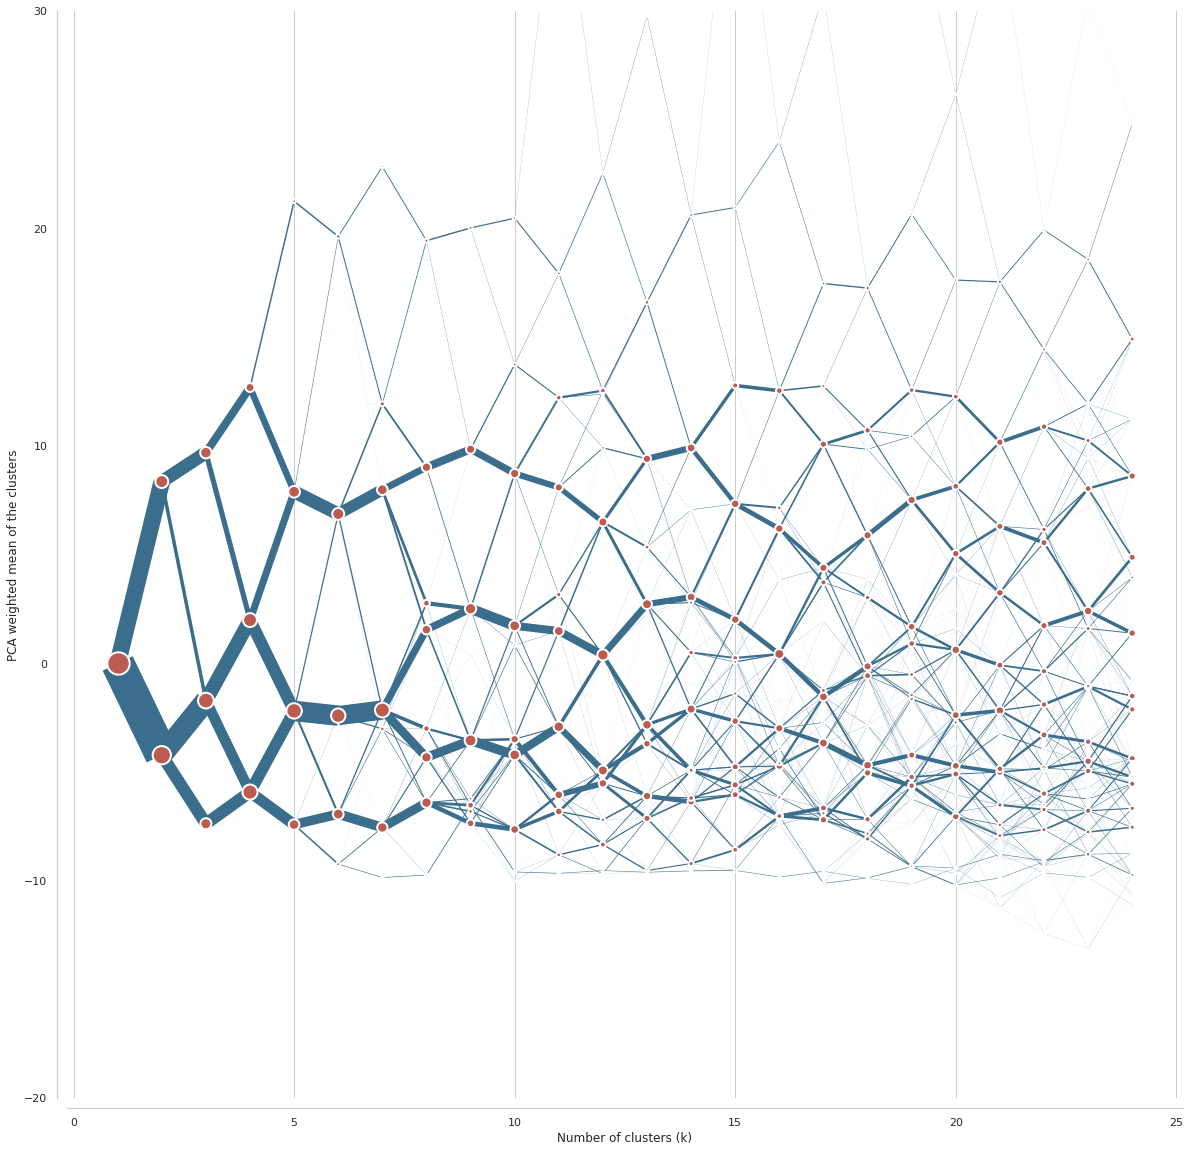

In [17]:
%%time

ax = cgram.plot(
    figsize=(20, 20),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_ylim(-20, 30)

In [18]:
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [19]:
fig =MiniBatchKMeansam.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
)
show(fig)

In [20]:
fig2 = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    pca_weighted=False
)
show(fig2)

<AxesSubplot:title={'center':'silhouette'}>

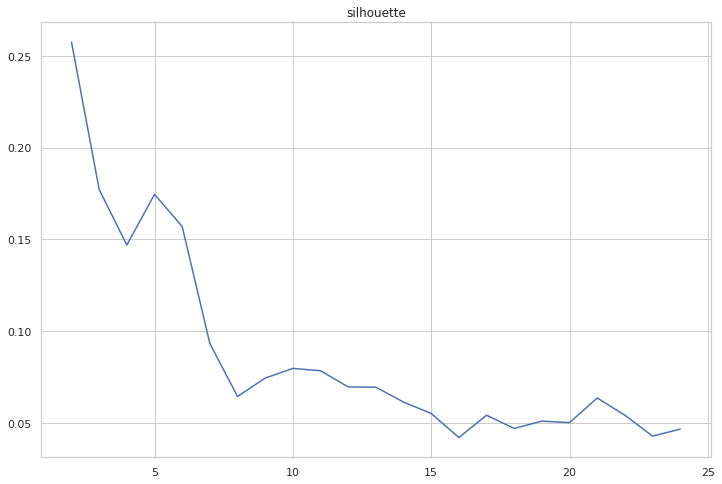

In [21]:
cgram.silhouette_score(sample_size=100_000)
cgram.silhouette.plot(figsize=(12, 8), title="silhouette")

<AxesSubplot:title={'center':'calinski_harabasz'}>

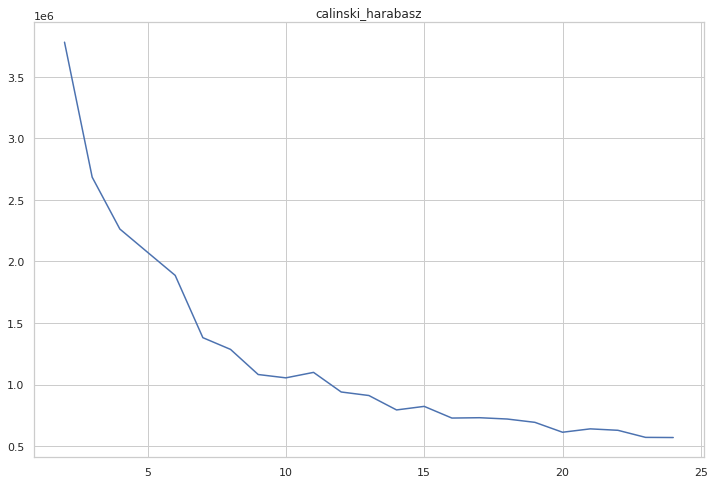

In [22]:
cgram.calinski_harabasz_score()
cgram.calinski_harabasz.plot(figsize=(12, 8), title="calinski_harabasz")

<AxesSubplot:title={'center':'davies_bouldin'}>

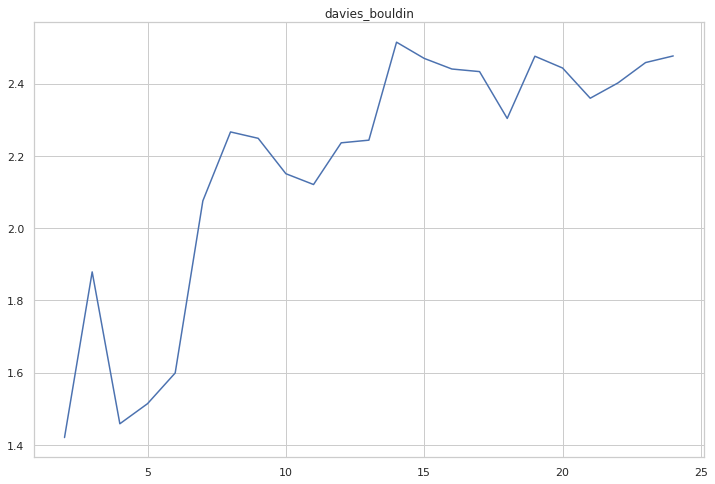

In [23]:
cgram.davies_bouldin_score()
cgram.davies_bouldin.plot(figsize=(12, 8), title="davies_bouldin")

In [24]:
labels = cgram.labels.copy()
labels.columns = labels.columns.astype("str")
labels.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_form_labels.pq")

In [25]:
import pickle

with open("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_form_centers.pickle",'wb') as f:
    pickle.dump(cgram.cluster_centers, f)

In [5]:
km = MiniBatchKMeans(n_clusters=8, batch_size=1_000_000, n_init=1000, random_state=42)
%time km.fit(data)

CPU times: user 7h 59min 14s, sys: 6h 38min 22s, total: 14h 37min 37s
Wall time: 2h 27min 42s


MiniBatchKMeans(batch_size=1000000, n_init=1000, random_state=42)

In [6]:
labels = km.labels_

In [12]:
pd.Series(labels).value_counts()

1    5544712
5    3774274
2    3451451
0    1554431
4     151529
3      62701
7        477
6          3
dtype: int64

In [11]:
pd.DataFrame(labels, columns=["k8"], index=data.index).to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/k8_form_labels.pq")

## Generation of signature geometry

With each tessellation cell labelled we now have to dissolve all 14.5 million cells into signature geometry.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve

In [2]:
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [5]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/k8_form_labels.pq")
labels

k8
hindex              
c000e094707t0000   0
c000e094763t0000   5
c000e094763t0001   5
c000e094763t0002   5
c000e094764t0000   5
...               ..
c102e644989t0111   5
c102e644989t0112   5
c102e644989t0113   5
c102e644989t0114   5
c102e644989t0115   5

[14539578 rows x 1 columns]

We first dissolve geometries in each chunk separately and store the result as another parquet file.

In [6]:
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="left", left_index=True, right_index=True)


    ddf = dask_geopandas.from_geopandas(geom.sort_values('k8'), npartitions=64)
    spsig = dask_dissolve(ddf, by='k8').compute().reset_index(drop=True).explode()

    spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/temp/spsig_{i}.pq")
    print(f"Chunk {i} done.")

Chunk 0 done.
Chunk 1 done.
Chunk 2 done.
Chunk 3 done.
Chunk 4 done.
Chunk 5 done.
Chunk 6 done.
Chunk 7 done.
Chunk 8 done.
Chunk 9 done.
Chunk 10 done.
Chunk 11 done.
Chunk 12 done.
Chunk 13 done.
Chunk 14 done.
Chunk 15 done.
Chunk 16 done.
Chunk 17 done.
Chunk 18 done.
Chunk 19 done.
Chunk 20 done.
Chunk 21 done.
Chunk 22 done.
Chunk 23 done.
Chunk 24 done.
Chunk 25 done.
Chunk 26 done.
Chunk 27 done.
Chunk 28 done.
Chunk 29 done.
Chunk 30 done.
Chunk 31 done.
Chunk 32 done.
Chunk 33 done.
Chunk 34 done.
Chunk 35 done.
Chunk 36 done.
Chunk 37 done.
Chunk 38 done.
Chunk 39 done.
Chunk 40 done.
Chunk 41 done.
Chunk 42 done.
Chunk 43 done.
Chunk 44 done.
Chunk 45 done.
Chunk 46 done.
Chunk 47 done.
Chunk 48 done.
Chunk 49 done.
Chunk 50 done.
Chunk 51 done.
Chunk 52 done.
Chunk 53 done.
Chunk 54 done.
Chunk 55 done.
Chunk 56 done.
Chunk 57 done.
Chunk 58 done.
Chunk 59 done.
Chunk 60 done.
Chunk 61 done.
Chunk 62 done.
Chunk 63 done.
Chunk 64 done.
Chunk 65 done.
Chunk 66 done.
Chunk

Now we combine all dissolved chunks and dissolve them again to get the final contiguous geometry.

In [7]:
spsigs = pd.concat([gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/temp/spsig_{i}.pq") for i in range(103)])

In [8]:
ddf = dask_geopandas.from_geopandas(spsigs.sort_values('k8').reset_index(drop=True), npartitions=64)
spsig = dask_dissolve(ddf, by='k8').compute().reset_index(drop=True).explode()

spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_K8_GB.pq")

In [9]:
spsig

k8                                       tessellation
0 0   0  POLYGON Z ((89280.000 7920.000 0.000, 89190.00...
  1   0  POLYGON Z ((92602.729 11420.758 0.000, 92581.2...
  2   0  POLYGON Z ((169705.076 15498.752 0.000, 169706...
  3   0  POLYGON Z ((170058.697 15486.278 0.000, 170003...
  4   0  POLYGON Z ((169696.219 16164.689 0.000, 169694...
..   ..                                                ...
7 5   7  POLYGON Z ((293374.200 758731.000 0.000, 29335...
  6   7  POLYGON Z ((283647.720 803019.800 0.000, 28364...
  7   7  POLYGON Z ((285459.203 803844.804 0.000, 28545...
  8   7  POLYGON Z ((283841.987 803707.777 0.000, 28384...
  9   7  POLYGON Z ((290570.716 809730.511 0.000, 29056...

[52393 rows x 2 columns]

The resulting geometry is dense and complicated. For exploration purposes, it is better to simplify it.

In [10]:
ddf = dask_geopandas.from_geopandas(spsig.reset_index().rename_geometry("geometry"), npartitions=64)
ddf.geometry = ddf.simplify(2).buffer(.001).simplify(2)

In [11]:
%time spsig = ddf.compute()

CPU times: user 27min 16s, sys: 6min 23s, total: 33min 40s
Wall time: 27min 11s


Now we save our geometries to files.

In [12]:
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_K8_GB_simplified.geojson", driver="GeoJSON")

In [13]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_form_K8_GB_simplified.pq")